In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn import metrics

## I. Mouse dataset

In [2]:
mouse_data = pd.read_csv('mouse.txt', sep=' ', header=None)

In [3]:
mouse_data.head()

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


#### Visualisation des données

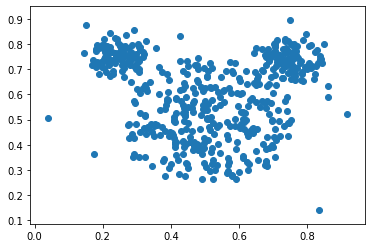

In [4]:
x = mouse_data.ix[:, 0].values
y = mouse_data.ix[:, 1].values
plt.scatter(x, y)

In [5]:
X = mouse_data.values

In [6]:
clf = IsolationForest(n_estimators = 50, random_state=1)
clf.fit(X)
y_pred = clf.predict(X)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


#### Visualisation des outliers détectés par l'isolation forest
#### On peut constater que tous les outliers sont détectés comme tel, cependant de nombreus points sont détectés comme étant des outliers alors qu'ils font en fait partie du bas du visage

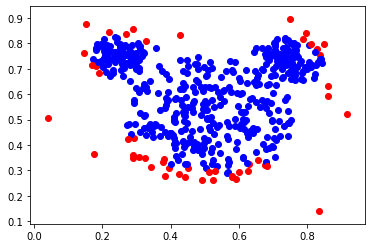

In [7]:
for xi, yi, ci in zip(x, y, y_pred):
    plt.scatter(xi, yi, color='b' if ci == 1 else 'r')

## II. Credit card dataset

In [8]:
credit_card_data = pd.read_csv('creditcard.csv', sep=',')
credit_card_data = credit_card_data.drop(columns=['Time'])
print(credit_card_data.shape)

(284807, 30)


In [9]:
credit_card_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### On isole les outliers

In [10]:
outliers = credit_card_data[credit_card_data['Class'] == 1]
print(outliers.shape)

(492, 30)


#### On sélectionne les 5000 permières lignes de classe 0

In [11]:
normal = credit_card_data[credit_card_data['Class'] == 0]
print(normal.shape)

(284315, 30)


In [12]:
def evaluate(n_normal, n_estimators):
    partial_normal = normal[:n_normal]
    
    concat = pd.concat([partial_normal, outliers]).values
    X_real = concat[:, :29]
    y_real = concat[:, 29]
    y_real = [-1 if y_r == 1 else 1 for y_r in y_real]
    
    clf = IsolationForest(n_estimators = 200, random_state=1)
    clf.fit(X_real)
    y_pred = clf.predict(X_real)
    
    acc = metrics.accuracy_score(y_real, y_pred)
    pre = metrics.precision_score(y_real, y_pred)
    rec = metrics.recall_score(y_real, y_pred)

    print('Accuracy du modèle :', acc)
    print('Precision du modèle :', pre)
    print('Recall du modèle :', rec)
    print()
    print('Matrice de confusion :')
    print()
    print(pd.DataFrame(
        metrics.confusion_matrix(y_real, y_pred),
        columns=['Prédit outlier', 'Prédit normal'],
        index=['Vrai outlier', 'Vrai normal']
    ))

#### Prédictions

In [13]:
evaluate(n_normal=5000, n_estimators=200)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Accuracy du modèle : 0.9461034231609614
Precision du modèle : 0.9759206798866855
Recall du modèle : 0.9646

Matrice de confusion :

              Prédit outlier  Prédit normal
Vrai outlier             373            119
Vrai normal              177           4823


In [14]:
evaluate(n_normal=50000, n_estimators=200)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Accuracy du modèle : 0.9075893210805672
Precision du modèle : 0.9988116720214779
Recall du modèle : 0.90776

Matrice de confusion :

              Prédit outlier  Prédit normal
Vrai outlier             438             54
Vrai normal             4612          45388


In [15]:
evaluate(n_normal=284315, n_estimators=200)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Accuracy du modèle : 0.9013331835242814
Precision du modèle : 0.9997815282101699
Recall du modèle : 0.9013594076992069

Matrice de confusion :

              Prédit outlier  Prédit normal
Vrai outlier             436             56
Vrai normal            28045         256270


#### Nous pouvons constater qu'avec un nombre de transactions normales de 50000 le modèle est capable d'identifier 438 fraudes sur les 492. En revanche, de nombreuses transactions normales sont identifiées comme fraudes, ce qui n'est pas forcément une bonne chose.
#### On peut constater qu'avec plus de données, l'identification des fraudes n'est pas meilleure et de nombreuses transactions normales sont mal identifées.